# Modeling Forest Fires Using Cellular Automata 
## Authors: Ali Kazmi, Kenji Bomar 
## CX 4230 Project 2 

## Abstract  
- put smt here about what cellular automata is and what they will learn. Also put a paragraph on the SUI: forest fires, their impact, etc. Talk about other ways to study the system, but give some reasons why CA are good. (~2 para long. See the example on recrystallization) 

## Outline: 
### 0: Introduction to Cellular Automata
- 0.1: Terminology 
- 0.2: Code for a simple 1D CA: Sierpinski Triangle 
- 0.3: Other cool 1D CA 
- 0.4: Classic 2D Cellular Automata: Game of Life

### 1: Applications to Forest fires
- 1.1: A simple cellular automata model of forest fires 
- 1.2 Animation?
- 1.3: Analysis of our simple cellular automata model
- 1.4: Stochastic additions to our model
- 1.5: Renormalization Group Analysis 

### 2: Literature Review
- 2.5: Citations

### 3: a data driven Cellular Automata model of forest fires
- 3.1: ELM

## 0: 1D Cellular Automata 
### 0.1: terminology 
A Cellular Automata (CA from here on) is a model built of cells on a grid. For now, we'll keep this grid one dimensional, but it can theoretically go to any dimension. Each cell is either alive (1) or dead (0). Each cell has a neighborhood, which are the cells around it. 

An example state of the system where everything is dead: [0,0,0,0,0] 

We will define a transition function that determines future value of a cell based on its neighbors. Then define a rules function that applys the transition on every cell in a 1d array. After those are made, you will define an intial state and apply these functions appropriately for however many iterations you want, and plot it so see the results over time.

### 0.2: Sierpinski Triangle
For the serpinski triangle the initial state is an all 0 array with a 1 in the middle. It results in fractal behavior!  




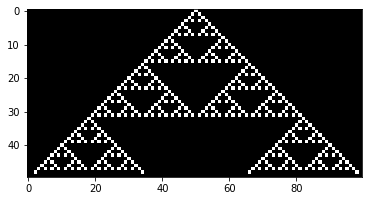

In [222]:
# In this we will be implementing a one dimensional cellular automata. It will appear to be the sierpienski triangle! 
# Note: We are laying one generation below the preceding one, so it will output a 2d grid. It is not two dimensional though!
# The output simply shows the evolution of the system over time. (The top is T=0. Time progresses downwards)
# We use standard python libraries for our plotting and data structures.
# We use alive (white) as 1 and dead (black) as 0.  
# If you are not familiar with python, try an introductory tutorial on that first
#This example shows fractal behavior arising from a 1D cellular automata. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Here we define the rules of transition. This will determine how the system evolves 
def transition(l,m,r):
    if(l == 1 and m==1 and r ==1):
        return 0
    elif (l == 1 and m == 1 and r==0):
        return 1
    elif (l == 1 and m == 0 and r==1):
        return 0
    elif (l == 1 and m == 0 and r==0):
        return 1
    elif (l == 0 and m == 1 and r==1):
        return 1
    elif (l == 0 and m == 1 and r==0):
        return 0
    elif (l == 0 and m == 0 and r == 1):
        return 1
    elif (l == 0 and m == 0 and r==0):
        return 0
    
#Here we apply the rules on the passed in array of cells. 
#Visualize looking at a one dimensional state (an array) and returning the next state 
def rules(cellsrow,w):
    # Use a temporary array because the transitions are based only on current states. 
    temp = np.copy(cellsrow)
    if(cellsrow.item(cellsrow.size-2)==1): #this case exists if we are going off the grid in the next iteration. Keeps viualization clean 
        return np.zeros((w,), dtype=int)
    for i in range(1, cellsrow.size - 1):
        #First look in the neighborhood. Be careful of edges! For now, we will leave them constant by changing the loop boundaries 
        l=cellsrow.item(i-1)
        m=cellsrow.item(i)
        r=cellsrow.item(i+1)
        temp[i] = transition(l,m,r)
    return temp

w=100 #experiment with this! It is the width of the grid. This visualization will run to fit it automatically. Try w = 50 and w = 500


z=np.zeros((w,), dtype=int)
cells=np.array([z])
cells.itemset(int(w/2),1)
#print(cells)
h=int(w/2) #height of our visualization. The number of generations, in other words 
for x in range (1, h):
    newrow=rules(cells[x-1,:],w)
    cells = np.append(cells,[newrow], axis=0)

#now, do the plot. 
fig = plt.figure()
#plt.grid(color='w', linestyle='-', linewidth=1) #uncomment this to show grid lines
ax = fig.add_subplot()
ax.imshow(cells, interpolation='nearest', cmap=cm.Greys_r) #Try different color maps!. Later in the tutorial, we will use fire colors
plt.show()

### 0.3: Other interesting 1D CA 
Find other patterns at https://mathworld.wolfram.com/ElementaryCellularAutomaton.html
Below we show our code adapted to rule 158 from wolfram alpha. It shows that a simple ruleset change can have drastic effects, even in the 1D case. Our code from before works, but we can change the rules and get different resulting patterns. 

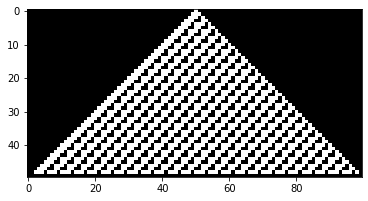

In [50]:
# In this we will be implementing a one dimensional cellular automata.  
# Note: We are laying one generation below the preceding one, so it will output a 2d grid. It is not two dimensional though!
# The output simply shows the evolution of the system over time. (The top is T=0. Time progresses downwards)
# We use standard python libraries for our plotting and data structures.
# We use alive (white) as 1 and dead (black) as 0.  (note: this is the opposite of what wolfram uses)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Here we define the rules of transition. This will determine how the system evolves 
def transition(l,m,r):
    if(l == 1 and m==1 and r ==1):
        return 1
    elif (l == 1 and m == 1 and r==0):
        return 0
    elif (l == 1 and m == 0 and r==1):
        return 0
    elif (l == 1 and m == 0 and r==0):
        return 1
    elif (l == 0 and m == 1 and r==1):
        return 1
    elif (l == 0 and m == 1 and r==0):
        return 1
    elif (l == 0 and m == 0 and r == 1):
        return 1
    elif (l == 0 and m == 0 and r==0):
        return 0
    
#Here we apply the rules on the passed in array of cells. 
#Visualize looking at a one dimensional state (an array) and returning the next state 
def rules(cellsrow,w):
    # Use a temporary array because the transitions are based only on current states. 
    temp = np.copy(cellsrow)
    if(cellsrow.item(cellsrow.size-2)==1): #this case exists if we are going off the grid in the next iteration. Keeps viualization clean 
        return np.zeros((w,), dtype=int)
    for i in range(1, cellsrow.size - 1):
        #First look in the neighborhood. Be careful of edges! For now, we will leave them constant by changing the loop boundaries 
        l=cellsrow.item(i-1)
        m=cellsrow.item(i)
        r=cellsrow.item(i+1)
        temp[i] = transition(l,m,r)
    return temp

w=100 #experiment with this! It is the width of the grid. This visualization will run to fit it automatically. Try w = 50 and w = 500


z=np.zeros((w,), dtype=int)
cells=np.array([z])
cells.itemset(int(w/2),1)
#print(cells)
h=int(w/2) #height of our visualization. The number of generations, in other words 
for x in range (1, h):
    newrow=rules(cells[x-1,:],w)
    cells = np.append(cells,[newrow], axis=0)

#now, do the plot. 
fig = plt.figure()
#plt.grid(color='w', linestyle='-', linewidth=1) #uncomment this to show grid lines
ax = fig.add_subplot()
ax.imshow(cells, interpolation='nearest', cmap=cm.Greys_r) #Try different color maps!. Later in the tutorial, we will use fire colors
plt.show()

### 0.4: Conway's game of life 
Now that you understand the concepts of the 1D model, it's time to up the complexity. Here we will explore our first 2D automata through a classic example<sup>0</sup>. In doing so you will learn the machinery needed to understand classical methods of modeling forest fires with cellular automata. Imagine looking at a field or a forest from the top down. That will be represented as a 2D grid. As iterations continue, we will display the results on that grid. Unlike the 1D case (where we increased the dimension and plotted it over time) we will not plot the evolution over time for this, as that would require a complex 3D visualization. Instead we will animate change over time on a 2d grid. The code to do so will be presented and explained here, so that we can freely utilize in the applications section. This is the last section of part 0, you're almost ready for the applications! 

To keep this tutorial brief all of the rules of the game of life will not be extensively covered. I encourage you to read the code and seek further resources if anything isn't clear. 
Core concepts: 
- 2D Cellular Automata. We visualize it with an animation. 
- Similar to the 1D case, we update the value in the cell based on the value of its neighbors according to rules
- The rule set is more extensive now, as each cell has 8 neighbors. 
- We still need to watch boundary conditions! A simple solution for this is to make everything wrap around

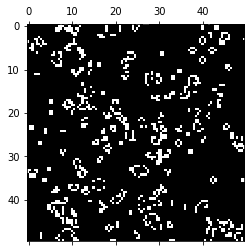

In [59]:
#Please run this code then click play on the player. Set mode to loop to see it run multiple times. 
#It functions in JupyterLab but not on github. Please contact 
#akazmi30@gatech.edu if you need to see a demo. Thank you! 

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

N = 100 #Feel free to change this value (50 lets you see the cells more clearly)
ON = 255
OFF = 0

# populate grid with random on/off - more off than on. Also make sure it is a square grid! 
cells = np.random.choice([ON,OFF], N*N, p=[0.2, 0.8]).reshape(N, N)


#As before, this function is what takes in one state and gives us the next 
def transition(data):
  global cells
  # copy grid, similar to how we copied over the array in the 1D case
  #8 neighbors for calculation now! 
  newGrid = cells.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (cells[i, (j-1)%N] + cells[i, (j+1)%N] + 
               cells[(i-1)%N, j] + cells[(i+1)%N, j] + 
               cells[(i-1)%N, (j-1)%N] + cells[(i-1)%N, (j+1)%N] + 
               cells[(i+1)%N, (j-1)%N] + cells[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if cells[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  cells = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap="Greys_r")
ani = animation.FuncAnimation(fig, transition, interval=50,
                              save_count=50)

#This code allows us to display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())

## 1: Applications to Forest Fires
### 1.1: A simple CA model for forest fires
In a paper from 2006, some simple rules were devised to model forest fires. Here we will present those ideas and show them in action. https://bib.irb.hr/datoteka/278897.Ljiljana_Bodrozic_ceepus2006_2.pdf 

As per the paper, we will use the following possible states. Before we only had two states (1 and 0), but now we will introduce more states to enable more accurate modeling. 
- 0: can be ignited
- 1: fire growing
- 2: burnt
- 3: burning

The rules for this simulation are the following: 
- An ignitable cell remains ignitable unless at least one neighbor is burning (in which case it is burning in the next step)
- A burning cell becomes a burnt cell in the next step.
- A burnt cell becomes a growing cell in the next step.
- A growing cell becomes ignitable in the next step.

This paper uses a 2D cellular automata, which builds off the core ideas of the game of life. We can expand that code by editing the rules and increasing the number of states. Because we are now modeling a fire, a color scheme change will be a nice bonus! Also, the initial state matters more now, as it is more realistic for a forest to have clumps of ignitable trees and a single source of the fire, so we will define a different seed. 

## 2: Literature Review
Currently, many methods have been attempted to model forest fires. Many different models have been attempted, but here I wiil focus on cellular automata based studies. The method presented above can be considered almost naive to current techniques. 

Traditional studies have focused on creating rule based Cellular Automata based on scientific principles. For instance, a study from 2006 focused on predicting the spread of the fires based on the transfer of fractional burned area, with factors of propagation from diagonal neighbor cells and a rate for the spread of fire<sup>1</sup>. A 2004 study<sup>2</sup> focused on using the same fire spread realtionships (developed by Rothermel in 1972) but on a hexagonal grid instead of a square one. One 2016 paper<sup>6</sup> outlines common rules and provides a Cellular Automata simulator for Forest Fires. These are essentially more detailed versions of what we presented in section 1 of this tutorial. 

A more recent paper<sup>3</sup> used a data driven approach to cellular automata. This model was actually tested using data collected from five fires in the United States, and achieved high levels of accuracy in simulating the spread of the fires. What was really unique about this study though was that instead of focusing on defining every aspect of the transition rules as usually done in a Cellular Automaton model it used a feedforward neural network known as the "Extreme Learning Machine." The ELM performed well in predicting each cell's igniting probability. It also was able to account for the impact of vind velocity on the fire spreading pattern. The ELM was integrated with the CA model because a rule based transition system was still implemented, but each iteration the ELM created the transition rules. This could be an interesting avenue to attempt to use within our study.

A 2017 paper<sup>4</sup> took similar data-driven cellular automata ideas (granted more advanced, as around a decade had passed) and parallelized it, providing GPU implementations of a fully parallel Fuzzy CA model. It was able to achieve parallel speedup, and used data from real fires to improve accuracy. 

Some studies don't focus on adding new details, but instead emphasize different factors of the CA model. For instance, one study<sup>5</sup> suggested that the optimal time step for the forest fire spread CA model is 1/8 of the time taken for the cellular material to be completely combusted. The same article also mentioned being reversible: it can identify fire source points! 

## 2.5: Citations 

0) 

1) Encinas, A. Hernández, et al. “Simulation of Forest Fire Fronts Using Cellular Automata.” Advances in Engineering Software, vol. 38, no. 6, 2007, pp. 372–378., doi:10.1016/j.advengsoft.2006.09.002.

2) Trunfio, Giuseppe A. “Predicting Wildfire Spreading Through a Hexagonal Cellular Automata Model.” Lecture Notes in Computer Science Cellular Automata, 2004, pp. 385–394., doi:10.1007/978-3-540-30479-1_40.

3) Zheng, Zhong, et al. “Forest Fire Spread Simulating Model Using Cellular Automaton with Extreme Learning Machine.” Ecological Modelling, vol. 348, 2017, pp. 33–43., doi:10.1016/j.ecolmodel.2016.12.022.

4) Ntinas, Vasileios G., et al. “Parallel Fuzzy Cellular Automata for Data-Driven Simulation of Wildfire Spreading.” Journal of Computational Science, vol. 21, 2017, pp. 469–485., doi:10.1016/j.jocs.2016.08.003.

5) Rui, Xiaoping, et al. “Forest Fire Spread Simulation Algorithm Based on Cellular Automata.” Natural Hazards, vol. 91, no. 1, 2017, pp. 309–319., doi:10.1007/s11069-017-3127-5.

6) Xuehua, Wang, et al. “A Cellular Automata Model for Forest Fire Spreading Simulation.” 2016 IEEE Symposium Series on Computational Intelligence (SSCI), 2016, doi:10.1109/ssci.2016.7849971.
